# Tugas Individu 1 - Clustering

**Tuliskan Nama dan NPM**

- Nama: Farzana Hadifa
- NPM: 1906398534



Pada tugas ini, peserta kuliah diharapkan untuk mempelajari, mengimplementasi, dan mengeksplorasi teknik-teknik *clustering*. Teknik yang dibahas pada tugas ini yaitu:
1. Partition-Based Clustering
2. Hierarchical Clustering
3. Density-Based Clustering

Selain dari teknik *clustering*, terdapat juga beberapa metode evaluasi hasil *clustering* yang akan dibahas.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from scipy import stats

## A. Preparation

Langkah pertama adalah melakukan import dataset. Dataset yang digunakan untuk tugas ini adalah hasil web crawling dari situs platform e-commerce [Newchic.com](https://www.newchic.com). Data ini terdiri dari katalog produk yang dijual pada situs tersebut beserta dengan metadata dari masing-masing produk yang dijualnya.

Untuk tugas ini, kita akan coba menggunakan dataset tersebut untuk dilakukan *clustering*. Dataset yang digunakan telah di-*sampling* untuk memperoleh 100 item barang per kategori dari keseluruhan 9 kategori yang ada.

Silakan unduh dataset melalui SceLe Penambangan Data.

Dataset diperoleh dari https://data.world/jfreex/products-catalog-from-newchiccom

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Data Lab/dataset.csv')
df.head(5)

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,shoes,Sandales & Mules,Fleur de broderie en cuir National Wind Weave ...,39.99,85.99,USD,54,905,False,NaN,...,# 01,# 02,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/womens-sandals-3601/p-1...,1055349,SKU412144
1,shoes,Derbies & Mocassins,Mocassins confortables à enfiler pour femmes,37.16,69.42,USD,47,29,False,NaN,...,Black,Beige,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/flats-3615/p-1651230.html,1651230,SKUE60367
2,shoes,Escarpins,Escarpins en cuir gaufré à fleurs rétro,59.99,159.89,USD,63,287,False,Socofy,...,Red,NaN,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-heels-3598/p-162...,1627742,SKUE32434
3,shoes,Sandales & Mules,Tassel Vintage Retro Chic Lace Up Peep Toe San...,59.12,140.69,USD,58,52,False,NaN,...,Beige,Noir,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/womens-sandals-3601/p-1...,1065425,SKU430233
4,shoes,Sneakers & Baskets,Baskets à plateforme en peluche chaudes,54.16,97.47,USD,44,81,False,NaN,...,White,Black,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/sneakersandathletic-359...,1594075,SKUD93518


In [160]:
df.columns

Index(['category', 'subcategory', 'name', 'current_price', 'raw_price',
       'currency', 'discount', 'likes_count', 'is_new', 'brand', 'brand_url',
       'codCountry', 'variation_0_color', 'variation_1_color',
       'variation_0_thumbnail', 'variation_0_image', 'variation_1_thumbnail',
       'variation_1_image', 'image_url', 'url', 'id', 'model'],
      dtype='object')

### Exploratory Data Analysis (EDA)

Kita akan melihat sekilas dataset ini untuk mengetahui karakteristik dataset serta menentukan keputusan apa yang bisa diambil.

Secara sekilas, terdapat beberapa kolom yang memiliki data missing, seperti `brand`, `brand_url`, `cod_country`, dan atribut lainnya. Namun hampir seluruh atribut utama memiliki data yang lengkap. Untuk tahap ini, kita bisa mengabaikan step untuk melakukan data cleaning.

In [6]:
# data cleaning:
df.isna().sum()

category                   0
subcategory                0
name                       0
current_price              0
raw_price                  0
currency                   0
discount                   0
likes_count                0
is_new                     0
brand                    763
brand_url                792
codCountry               129
variation_0_color        153
variation_1_color        282
variation_0_thumbnail    153
variation_0_image        153
variation_1_thumbnail    282
variation_1_image        282
image_url                  0
url                        0
id                         0
model                      0
dtype: int64

Berikutnya kita coba analisis bagaimana distribusi label kategori dan subkategorinya. Kategori telah difilter secara manual untuk mendapatkan 100 item pada setiap kategori yang ada.

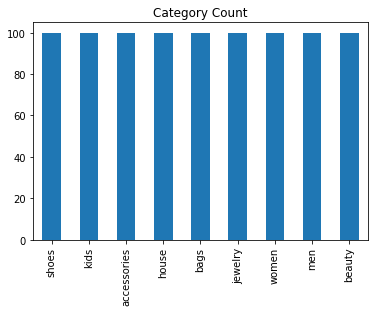

In [7]:
df['category'].value_counts().plot(kind='bar')
plt.title('Category Count')
plt.show()

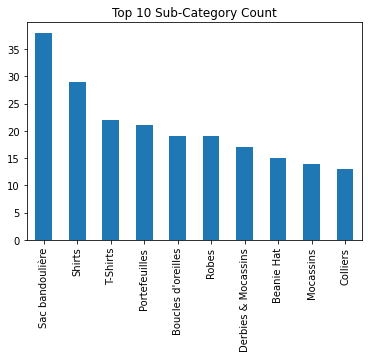

In [9]:
df['subcategory'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Sub-Category Count')
plt.show()

Selain dari kategori, kita juga bisa menganalisis distribusi katalog produk dijual di negara mana saja. Sebagai salah satu platform e-commerce multinasional, Newchic.com menjual produknya ke beberapa negara. Pada dataset ini, terdapat 6 variasi negara dari Asia Tenggara, yaitu Indonesia, Malaysia, Filipina, Singapura, Thailand, dan Vietnam.

Untuk sementara, atribut ini belum digunakan. Namun bisa dilakukan untuk konteks eksplorasi.

In [10]:
df['codCountry'].value_counts()

ID,MY,PH,SG,TH,VN    736
TH                     9
ID,MY,TH               8
PH,TH,VN               8
VN                     8
ID,VN                  1
SG                     1
Name: codCountry, dtype: int64

## B. Clustering

Selanjutnya, kita coba ambil atribut numerik yang tersedia pada dataset ini. Terdapat 4 atribut yang bisa kita gunakan, yaitu:
1. `current_price`
2. `raw_price`
3. `discount`
4. `likes_count` 

Hipotesis yang akan kita coba eksplorasi adalah bagaimana performa clustering pada katalog produk e-commerce berdasarkan atribut harga, diskon, dan jumlah pengguna yang menyukai produk.

Pertama kita akan coba visualisasikan distribusi data ke dalam scatter plot. Untuk mempermudah visualisasi, kita gunakan **Principal Component Analysis (PCA)** sebagai metode untuk *dimensionality reduction*.

In [8]:
def visualize_scatter_by_label(X_pca, y):
  fig, ax = plt.subplots()
  for g in np.unique(y):
    i = np.where(y == g)
    ax.scatter(X_pca[i,0], X_pca[i,1], label=g)
  # ax.legend()
  plt.show()

Sebagai tambahan, atribut-atribut numerik yang digunakan akan di-*scaling* terlebih dahulu. 

#### **TO DO**

Isi `features_list` dengan nama-nama fitur yang Anda gunakan. Berikut adalah pembagian fiturnya:
- Nama depan dimulai dengan huruf A-D: `[current_price, raw_price, discount]` 
- Nama depan dimulai dengan huruf E-I: `[current_price, raw_price, likes_count]`
- Nama depan dimulai dengan huruf J-M: `[current_price, discount, likes_count]`
- Nama depan dimulai dengan huruf N-Z: `[raw_price, discount, likes_count]`

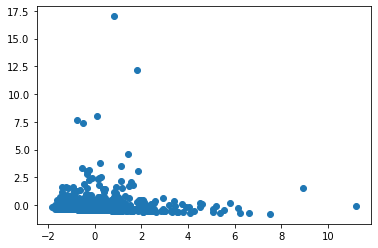

In [7]:
features_list = ['current_price', 'raw_price', 'likes_count'] 

X = df[features_list].to_numpy()
X = StandardScaler().fit_transform(X)
    
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1])

### B1. Partition-based Clustering

Salah satu algoritma yang umum digunakan adalah K-Means. Kita coba melakukan fitting algoritma K-Means clustering ke dataset yang tersedia. Untuk jumlah cluster, kita akan coba sesuaikan dengan jumlah kategori yang ada, yaitu

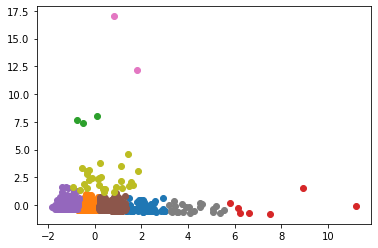

In [167]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=9)
k_means.fit(X)

y = k_means.predict(X)

visualize_scatter_by_label(X_pca, y)

#### **Soal 1**

a. Lakukan evaluasi Silhouette pada hasil prediksi sebelumnya, lalu berikan analisis apakah skor tersebut sudah baik atau kurang baik.

b. Lakukan elbow method untuk mendapatkan jumlah cluster terbaik.

> a. Evaluasi Silhouette 

In [55]:
# Evaluasi Silhouette 
score = silhouette_score(X, k_means.labels_)
print(f'Silhouette coefficient: {score}')

Silhouette coefficient: 0.37895278450539993


**Analisis silhouette skor**

Silhouette skor berkisar antara [-1, 1], dengan -1 adalah hasil terburuk, 1 adalah hasil terbaik, dan 0 menandakan kluster yang terbentuk overlaping. Skor silhoutte pada model ini tidak terlalu tinggi yaitu sekitar 0.38, skor tersebut bukan hasil terbaik namun tidak buruk juga karena nilainya bukan 0 dan tidak negatif.

> b. Elbow Method

In [41]:
# Elbow Method
inertias = []
for k in range(1, 10):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    inertias.append(k_means.inertia_)

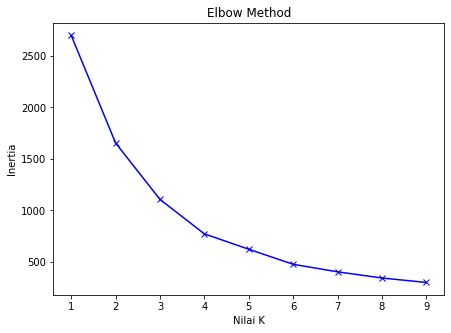

In [54]:
# Plot elbow
plt.figure(figsize=(7,5))
plt.plot(range(1,10), inertias, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Dari grafik elbow diatas, elbow point ada saat k = 4. Jadi, cluster yang paling baik adalah 4 cluster.

#### **Soal 2**

Sebelumnya sudah dilakukan implementasi clustering dengan k-Means. Implementasikan algoritma *partition-based clustering* lainnya:
- Implementasikan **k-Modes** (Anda perlu melakukan binning data agar menjadi ordinal/kategorikal)

Selain binning data, buat juga definisi distance function antar bin data. Jumlah bin data dibebaskan ke peserta kuliah dengan batasan maksimum 10 bin data per atribut.
****
**Penjelasan Algoritma k-Modes**

Serupa dengan k-Means, algoritma k-Modes dilakukan secara iteratif hingga konvergen. Kriteria konvergen adalah apabila 
1. **Cluster Assignment**: setiap *instance* di-*assign* ke satu *cluster* di mana *centroid*nya memiliki kedekatan paling tinggi (*distance* paling kecil) ke *instance* tersebut.
2. **Mean Recomputation**: Pada akhir epoch, *centroid* untuk masing-masing *cluster* dihitung ulang berdasarkan **mode/modus** dari *cluster* tersebut. 
3. **Convergence** Jika cluster pada iterasi ini sama persis dengan cluster pada iterasi sebelumnya, maka solusi telah dianggap konvergen dan proses training diakhiri. Jika belum, maka kembali ke langkah pertama dan dilakukan terus-menerus hingga konvergen atau sudah memenuhi batas epoch.

Satu epoch merupakan satu iterasi dari nomor 1-3. Untuk solusi yang diharapkan, cukup dibatasi hingga 3 epoch saja maksimal.

**Pseudocode**
```{r, eval=FALSE}
Initialize k number of centroids with random values

While (not converge) and (Iter < Max_Epoch) do

  For each instance x_i do
    Find the nearest Centroid(c_1, c_2, .., c_k)
    Assign instance x_i to that cluster
  endfor

  For each cluster j = 1..k do
    new centroid c_j := mode of all points in cluster j
  endfor

endwhile

```

Referensi pseudocode: https://towardsdatascience.com/k-means-clustering-introduction-to-machine-learning-algorithms-c96bf0d5d57a 
  

> **Binning**

In [9]:
data = df[features_list].copy()
def binning():
  all_bins = [] 
  for i in features_list:
    if i == 'likes_count':
      bins = np.linspace(min(data[i]), max(data[i]), 6)
    else:
      bins = np.linspace(min(data[i]), max(data[i]), 4)
    all_bins.append(bins)
  return all_bins

In [10]:
all_bins = binning()
kategori_harga = ['Murah', 'Standar', 'Mahal']
kategori_like = ['Sangat Sedikit','Sedikit', 'Standar', 'Banyak', 'Sangat Banyak']

In [121]:
data['kategori_current_rice'] = pd.cut(data['current_price'], all_bins[0], labels=kategori_harga, include_lowest=True)
data['kategori_raw_rice'] = pd.cut(data['raw_price'], all_bins[1], labels=kategori_harga, include_lowest=True)
data['kategori_likes'] = pd.cut(data['likes_count'], all_bins[2], labels=kategori_like, include_lowest=True)
data_kategori = data[['kategori_current_rice', 'kategori_raw_rice', 'kategori_likes']].copy()
data_kategori_arr = data_kategori.to_numpy()
data_kategori_arr

array([['Murah', 'Murah', 'Sangat Sedikit'],
       ['Murah', 'Murah', 'Sangat Sedikit'],
       ['Standar', 'Standar', 'Sangat Sedikit'],
       ...,
       ['Murah', 'Murah', 'Sangat Sedikit'],
       ['Murah', 'Murah', 'Sangat Sedikit'],
       ['Murah', 'Murah', 'Sangat Sedikit']], dtype=object)

> **Dist**

In [12]:
def dist(data1, data2):
   dist = 0
   for i in range(0,3):
     if data1[i] != data2[i]:
       dist += 1
   return dist


> **K-modes**

In [158]:
# K-modes untuk Membuat 3 cluster
def kmode():
  # Memilih 3 centroid
  c1 = data_kategori_arr[0]
  c2 = data_kategori_arr[3]
  c3  = data_kategori_arr[631]

  cluster_column = []
  iter = 0
  converge = False
  while (not converge) and (iter < 3):
    prev_cluster = cluster_column.copy()
    cluster_1 = []
    cluster_2 = []
    cluster_3 = []
    cluster_column = []
    
    for i in range(0,len(data_kategori_arr)):
      row = data_kategori_arr[i]
      # Hitung distance
      dist_c1 = dist(c1,row)
      dist_c2 = dist(c2,row)
      dist_c3 = dist(c3,row)
      distances = [dist_c1,dist_c2,dist_c3]

      # cluster assignment
      pos = distances.index(min(distances))
      if(pos == 0):
        cluster_1.append(row)
        cluster_column.append(1)
      elif(pos == 1):
        cluster_2.append(row)
        cluster_column.append(2)
      else:
        cluster_3.append(row)
        cluster_column.append(3)
    
    # Cari centroid baru dengan modus
    
    c1 = stats.mode(np.array(cluster_1))[0][0]
    c2 = stats.mode(np.array(cluster_2))[0][0]
    c3 = stats.mode(np.array(cluster_3))[0][0]

    # Cek Konvergen
    if (prev_cluster == cluster_column):
      converge = True
    iter += 1
    
  data_kategori['cluster']= cluster_column
  return data_kategori




In [159]:
hasil_cluster = kmode()
hasil_cluster.head()

,kategori_current_rice,kategori_raw_rice,kategori_likes,cluster
0,Murah,Murah,Sangat Sedikit,1
1,Murah,Murah,Sangat Sedikit,1
2,Standar,Standar,Sangat Sedikit,2
3,Standar,Standar,Sangat Sedikit,2
4,Murah,Murah,Sangat Sedikit,1


### B2. Hierarchical Clustering

Selanjutnya, kita akan mengeksplorasi hierarchical clustering. Berbeda dengan partition-based, pendekatan ini memandang clustering sebagai sebuah dekomposisi dari dataset berdasarkan nilai *similarity* antar instance.

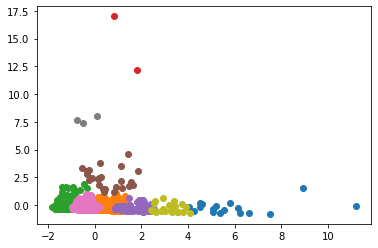

In [169]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=9)
y_agg = agg_cluster.fit_predict(X)

visualize_scatter_by_label(X_pca, y_agg)

#### **Soal 3**

a. Lakukan eksplorasi parameter berapa jumlah cluster yang paling pas untuk dataset ini dengan algoritma hierarchical clustering.

b. Di bawah telah disediakan centroid means untuk masing-masing kategori dari katalog produk. Visualisasikan dendrogram dengan centroid dari masing-masing kategori.

In [104]:
# Mean centroid untuk setiap category
category_centroids = []

for i in range(9):
  start = i*100
  end = i*100+100
  category_centroids.append(np.mean(X[start:end], axis=0))

category_centroids = np.array(category_centroids)
category_centroids

array([[ 0.73717267,  0.84500604,  0.22354217],
       [-0.19073703, -0.04530138, -0.17811265],
       [-0.68152127, -0.71987535, -0.2117535 ],
       [-0.17987028, -0.24996721,  0.00774066],
       [ 0.12515847,  0.17096898,  0.00701376],
       [-0.19381669, -0.19395298, -0.03098847],
       [ 0.09599522,  0.18247692,  0.23293369],
       [ 0.3349898 ,  0.09382513,  0.07987803],
       [-0.0473709 , -0.08318015, -0.13025368]])

> a. Eksplorasi parameter berapa jumlah cluster yang paling pas untuk dataset ini dengan algoritma hierarchical clustering.

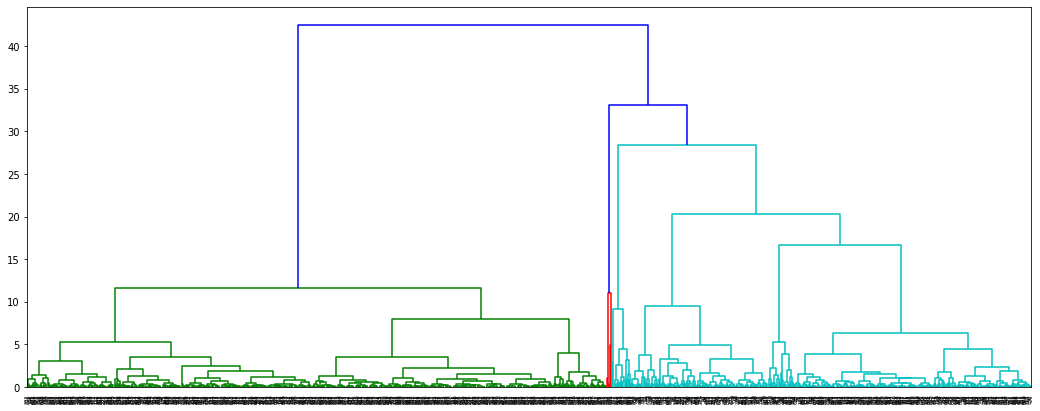

In [108]:
plt.figure(figsize=(18,7))
dendrogram(linkage(X, method='ward'))
plt.show()

**Dari dendogram terlihat bahwa jumlah cluster terbaik adalah 3**

> b. Visualisasikan dendrogram dengan centroid dari masing-masing kategori.

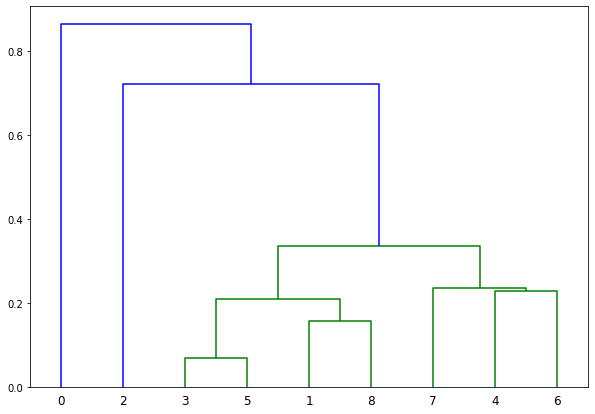

In [106]:
plt.figure(figsize=(10,7))
dendrogram(linkage(category_centroids))
plt.show()

#### **Soal 4**

Berdasarkan dendrogram yang telah kalian buat, bagaimana pemetaan centroid kategori pada cluster jika dilakukan clustering sebanyak ***Z*** cluster?

`Z = (digit akhir NPM) + 2`

*Misal NPM = 1234567894, maka `Z = 4+2 = 6`

**Jawaban:**

Z = 6, 6 cluster

cluster 1: 0

cluster 2: 2

cluster 3: 3, 5, 1,8

cluster 4: 7

cluster 5: 4

cluster 6: 6

### B3. Density-based Clustering



Jenis clustering lainnya yaitu Density-Based Clustering. Berbeda dengan dua metode lainnya, clustering ini memetakan bukan berdasarkan jumlah cluster, melainkan berdasarkan seberapa padat suat area.

#### **Soal 5**

a. Lakukan clustering dengan DBSCAN, lalu visualisasikan dengan fungsi `visualize_scatter_by_label()` seperti sebelumnya.

b. Dari hasil yang diperoleh pada bagian a, apakah metode ini cocok untuk dataset katalog produk? Berikan alasannya.

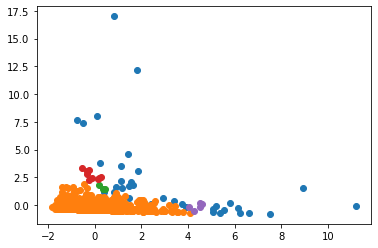

In [201]:
db_clustering = DBSCAN(min_samples=3)
y_dbscan = db_clustering.fit_predict(X)
visualize_scatter_by_label(X_pca, y_dbscan)

Menurut saya tidak cocok.

Alasan: 
kita ingin mengkluster kategori produk yaitu ada 9 kategori atau akan ada 9 kluster. Namun,  clustering dengan Dbscan tersebut tidak menghasilkan 9 kluster.

## C. Analisis

#### **Soal 6**

a. Lakukan evaluasi dengan internal dan external measure, metode mana yang paling cocok antara *partitioning*, *hierarchical*, dan *density-based* untuk menyelesaikan clustering kategori katalog produk *e-commerce* pada data tugas ini.

b. Sebutkan 3 fitur lain yang mungkin dapat meningkatkan performa dari clustering pada data ini. Asumsikan Anda adalah CTO perusahaan *e-commerce* dan dapat menentukan data apa saja yang bisa dikoleksi dari aktivitas *e-commerce*. Rasionalisasikan bahwa fitur tersebut bisa dikumpulkan dalam situasi riil.

> **a. Evaluasi dengan internal dan external measure**

**Internal measure:**

In [259]:
score = silhouette_score(X, k_means.labels_)
print(f'Partition Based silhouette coefficient: {score}')

score = silhouette_score(X, y_agg)
print(f'Hierarchical Silhouette coefficient: {score}')

score = silhouette_score(X, y_dbscan)
print(f'Density Based Silhouette coefficient: {score}')

Partition Based silhouette coefficient: 0.3768537815454243
Hierarchical Silhouette coefficient: 0.3391168286863171
Density Based Silhouette coefficient: 0.30303448330010924


Hasil evaluasi yang paling baik adalah yang paling tingi nilai sihoutte-nya yaitu partition based(algoritma kmeans)

**External measure:**

In [260]:
y_true = df['category'].copy()
for i in range(9):
  start = i*100
  end = i*100+100
  y_true[start:end] = i
y_true

0      0
1      0
2      0
3      0
4      0
      ..
895    8
896    8
897    8
898    8
899    8
Name: category, Length: 900, dtype: object

In [262]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [263]:
score = purity_score(y_true, k_means.labels_)
print(f'Partition Based purity: {score}')

score = purity_score(y_true, y_agg)
print(f'Hierarchical purity: {score}')

score = purity_score(y_true, y_dbscan)
print(f'Density Based purity: {score}')

Partition Based purity: 0.25333333333333335
Hierarchical purity: 0.25222222222222224
Density Based purity: 0.12666666666666668


Hasil evaluasi yang paling baik adalah yang paling tingi nilai purity-nya yaitu partition based(algoritma kmeans)

b. 3 fitur lain:
- penilaian (bintang 1-5)
- metode pengiriman barang
- lokasi barang

ketiga fitur tersebut sangat mungkin untuk didapatkan dan sudah sering ada di platform-platform e-commerce seperti tokopedia